This is Will Bruces attept at a linear regression model to predict life expectancy of the ___ dataset

In [62]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline

This now we have all required imports we will now use the standadized data file with the Developed and Developing country status binorised as 1 and 0.

In [63]:
data = pd.read_csv("StandardizedDataFrameWithNansFilled.csv", index_col=0)
data["Status"] = [1 if stat == "Developed" else 0 for stat in data["Status"]]
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,-0.444372,0.791452,0.268778,-1.139938,-0.335513,-0.110366,-0.964550,0.255316,-3.254219,0.911749,-0.723742,-0.32339,2.812651,2.772807,-0.725277,-0.579832
1,Afghanistan,2014,0,-0.980783,0.855926,0.285738,-1.139938,-0.334384,-0.168095,-0.989641,0.274014,-1.039197,0.919893,-0.850094,-0.32339,2.880918,2.817423,-0.739924,-0.610466
2,Afghanistan,2013,0,-0.980783,0.831748,0.302697,-1.139938,-0.334537,-0.173502,-1.014732,0.292712,-0.868811,0.899533,-0.765859,-0.32339,2.926429,2.862039,-0.769218,-0.641099
3,Afghanistan,2012,0,-1.022854,0.863985,0.328137,-1.139938,-0.332040,0.032040,-1.039823,0.317642,-0.655828,1.058344,-0.639507,-0.32339,2.971940,2.928963,-0.803395,-0.671733
4,Afghanistan,2011,0,-1.054408,0.888163,0.345097,-1.139938,-0.367800,0.051748,-1.059895,0.342573,-0.613232,0.793659,-0.597390,-0.32339,3.040207,2.973578,-0.847336,-0.763634


In [64]:
column_names = data.columns

print(column_names)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [65]:
# Split dataset into features and target vector
Life_expectancy = data['Life expectancy ']
data = data.drop(['Life expectancy ','Country','Year'], axis=1)
data.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,0.791452,0.268778,-1.139938,-0.335513,-0.110366,-0.964550,0.255316,-3.254219,0.911749,-0.723742,-0.32339,2.812651,2.772807,-0.725277,-0.579832
1,0,0.855926,0.285738,-1.139938,-0.334384,-0.168095,-0.989641,0.274014,-1.039197,0.919893,-0.850094,-0.32339,2.880918,2.817423,-0.739924,-0.610466
2,0,0.831748,0.302697,-1.139938,-0.334537,-0.173502,-1.014732,0.292712,-0.868811,0.899533,-0.765859,-0.32339,2.926429,2.862039,-0.769218,-0.641099
3,0,0.863985,0.328137,-1.139938,-0.332040,0.032040,-1.039823,0.317642,-0.655828,1.058344,-0.639507,-0.32339,2.971940,2.928963,-0.803395,-0.671733
4,0,0.888163,0.345097,-1.139938,-0.367800,0.051748,-1.059895,0.342573,-0.613232,0.793659,-0.597390,-0.32339,3.040207,2.973578,-0.847336,-0.763634


In [66]:
# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(data,Life_expectancy)

LinearRegression()

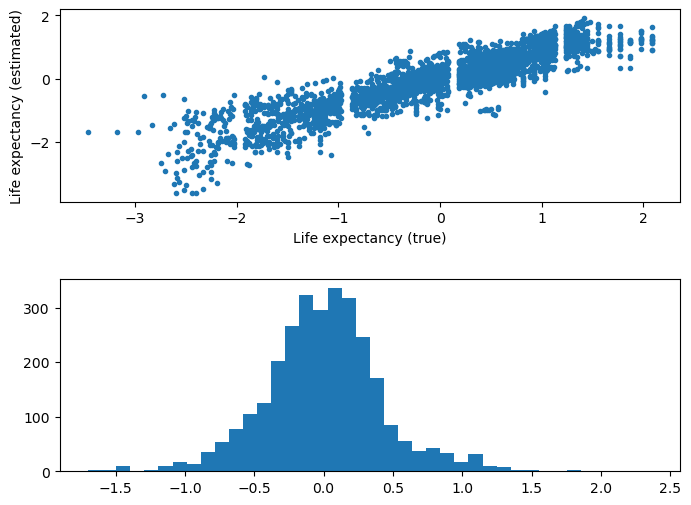

In [88]:
# Predict alcohol content
y_est = model.predict(data)
residual = y_est-Life_expectancy

# Display scatter plot
plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.plot(y, y_est, '.')
plt.xlabel('Life expectancy (true)'); plt.ylabel('Life expectancy (estimated)')
plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,2)
plt.hist(residual,40)

plt.show()

The top plot expresses the life expectancy estimated by the model against the true life expectancy.
The bottom plot 